In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Read the data and look at the first 5 Entries

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [ ]:
# Check if there are any missing values in the dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Create a copy of the original dataset and replace the 0 values of the impacted columns with the mean values

df_0 = df.copy()

cols_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols_0:
    df_0[i].replace(0,df_0[i].mean(),inplace=True)

df_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
df_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


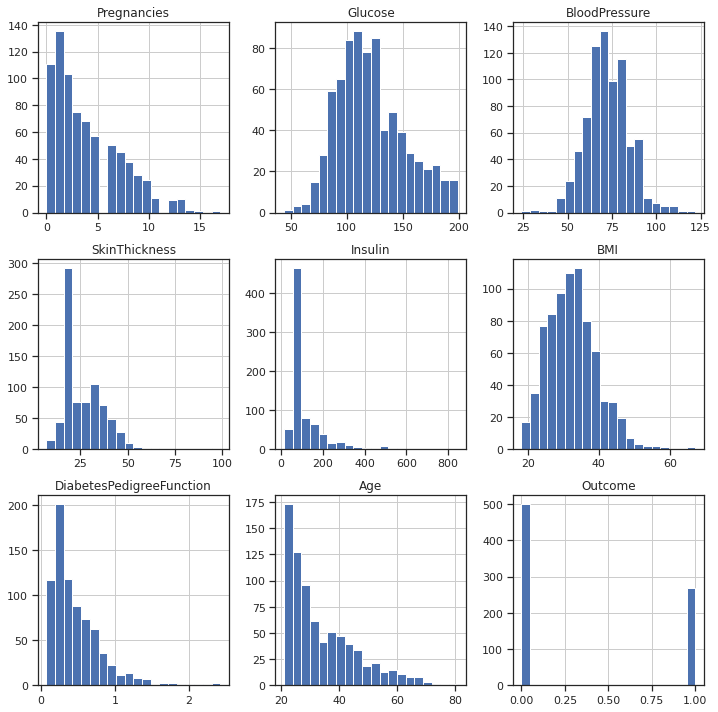

In [ ]:
# Histogram plot of data

col = list(df_0.columns)
df_0[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3))
plt.tight_layout()

## Check Corelation of Data

In [ ]:
df_0.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


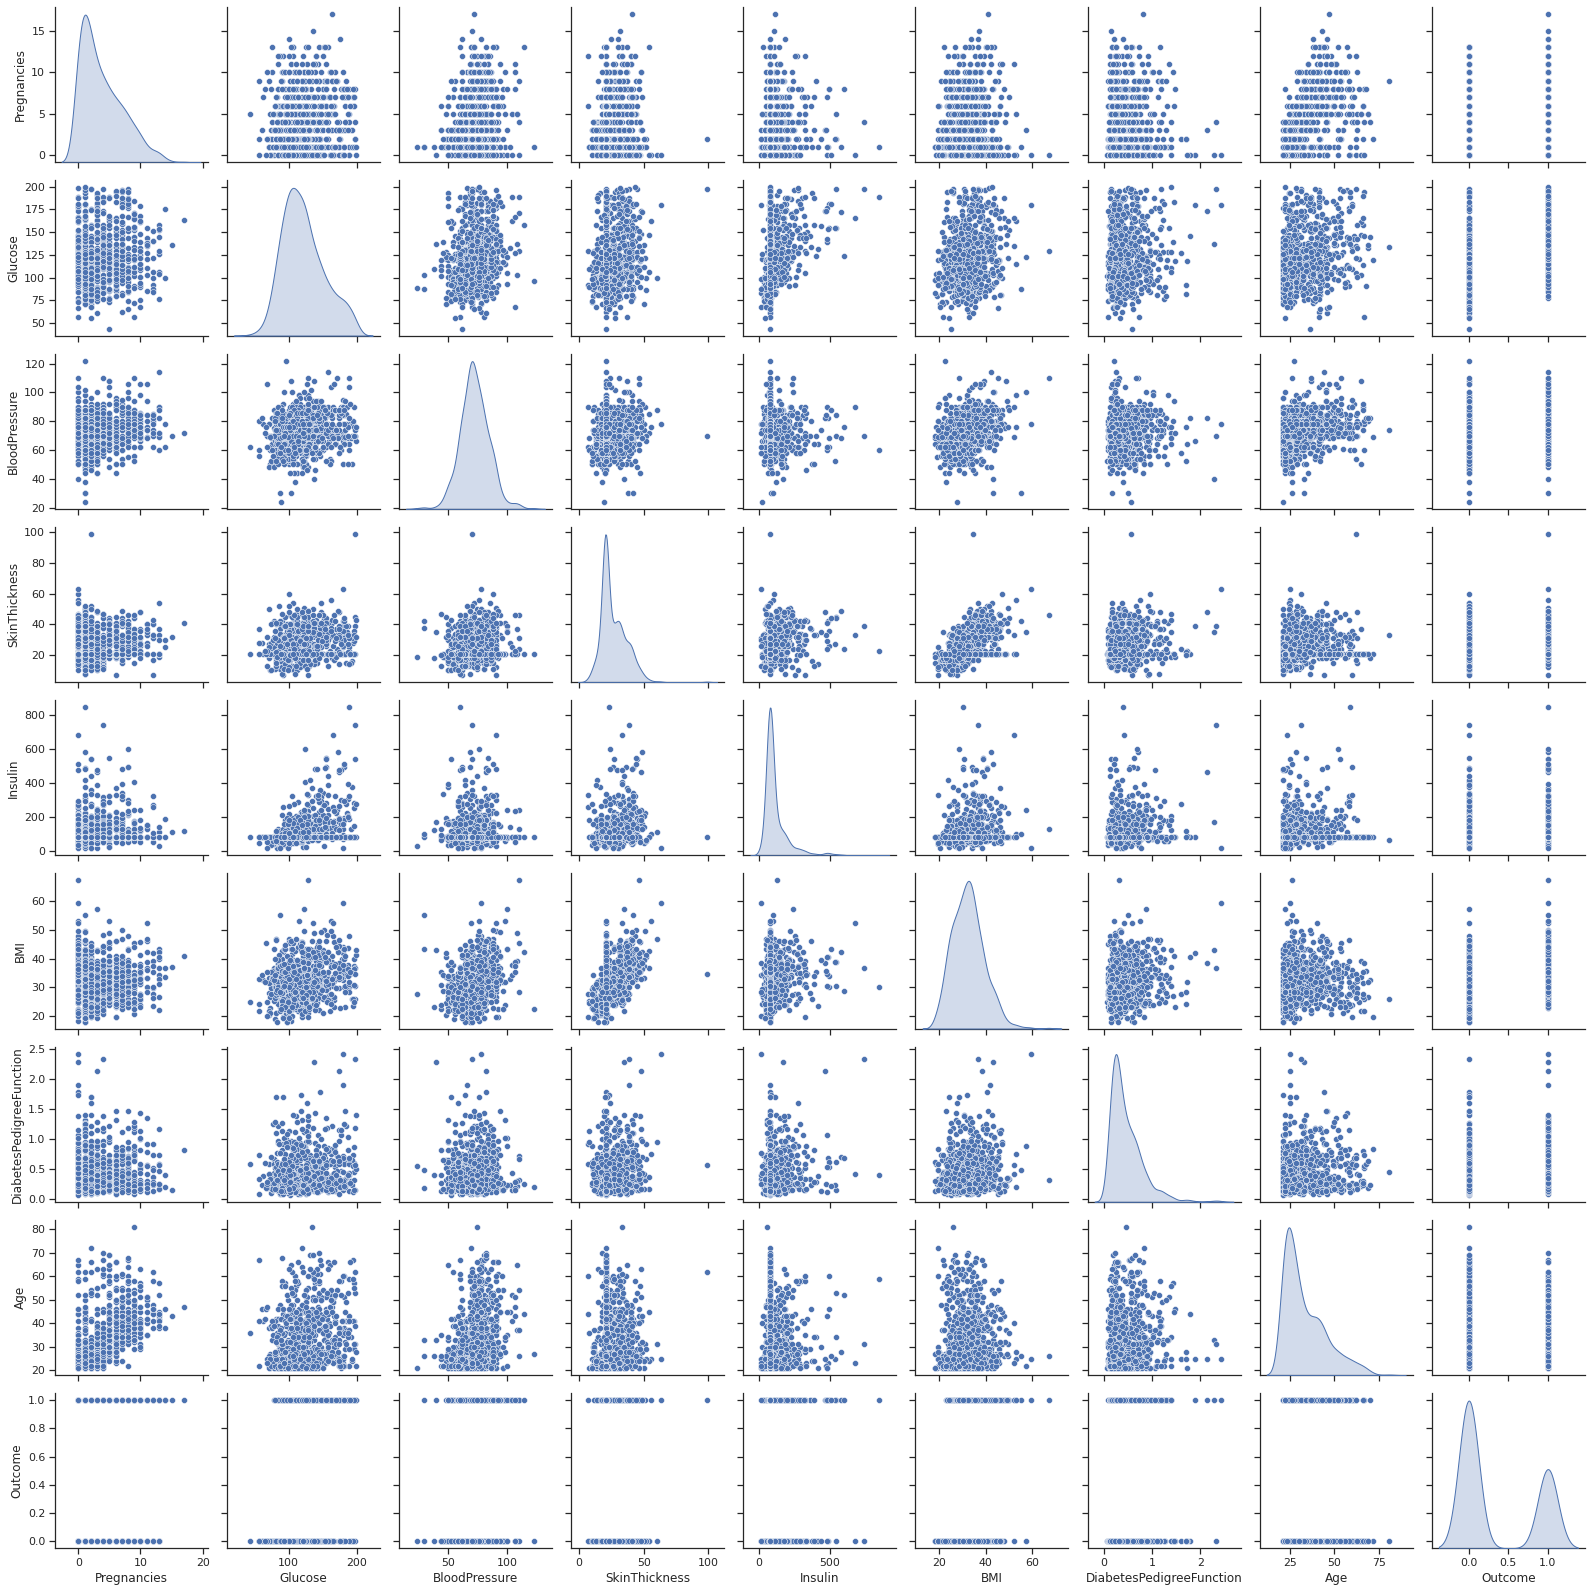

In [ ]:
sns.pairplot(df_0,diag_kind='kde');

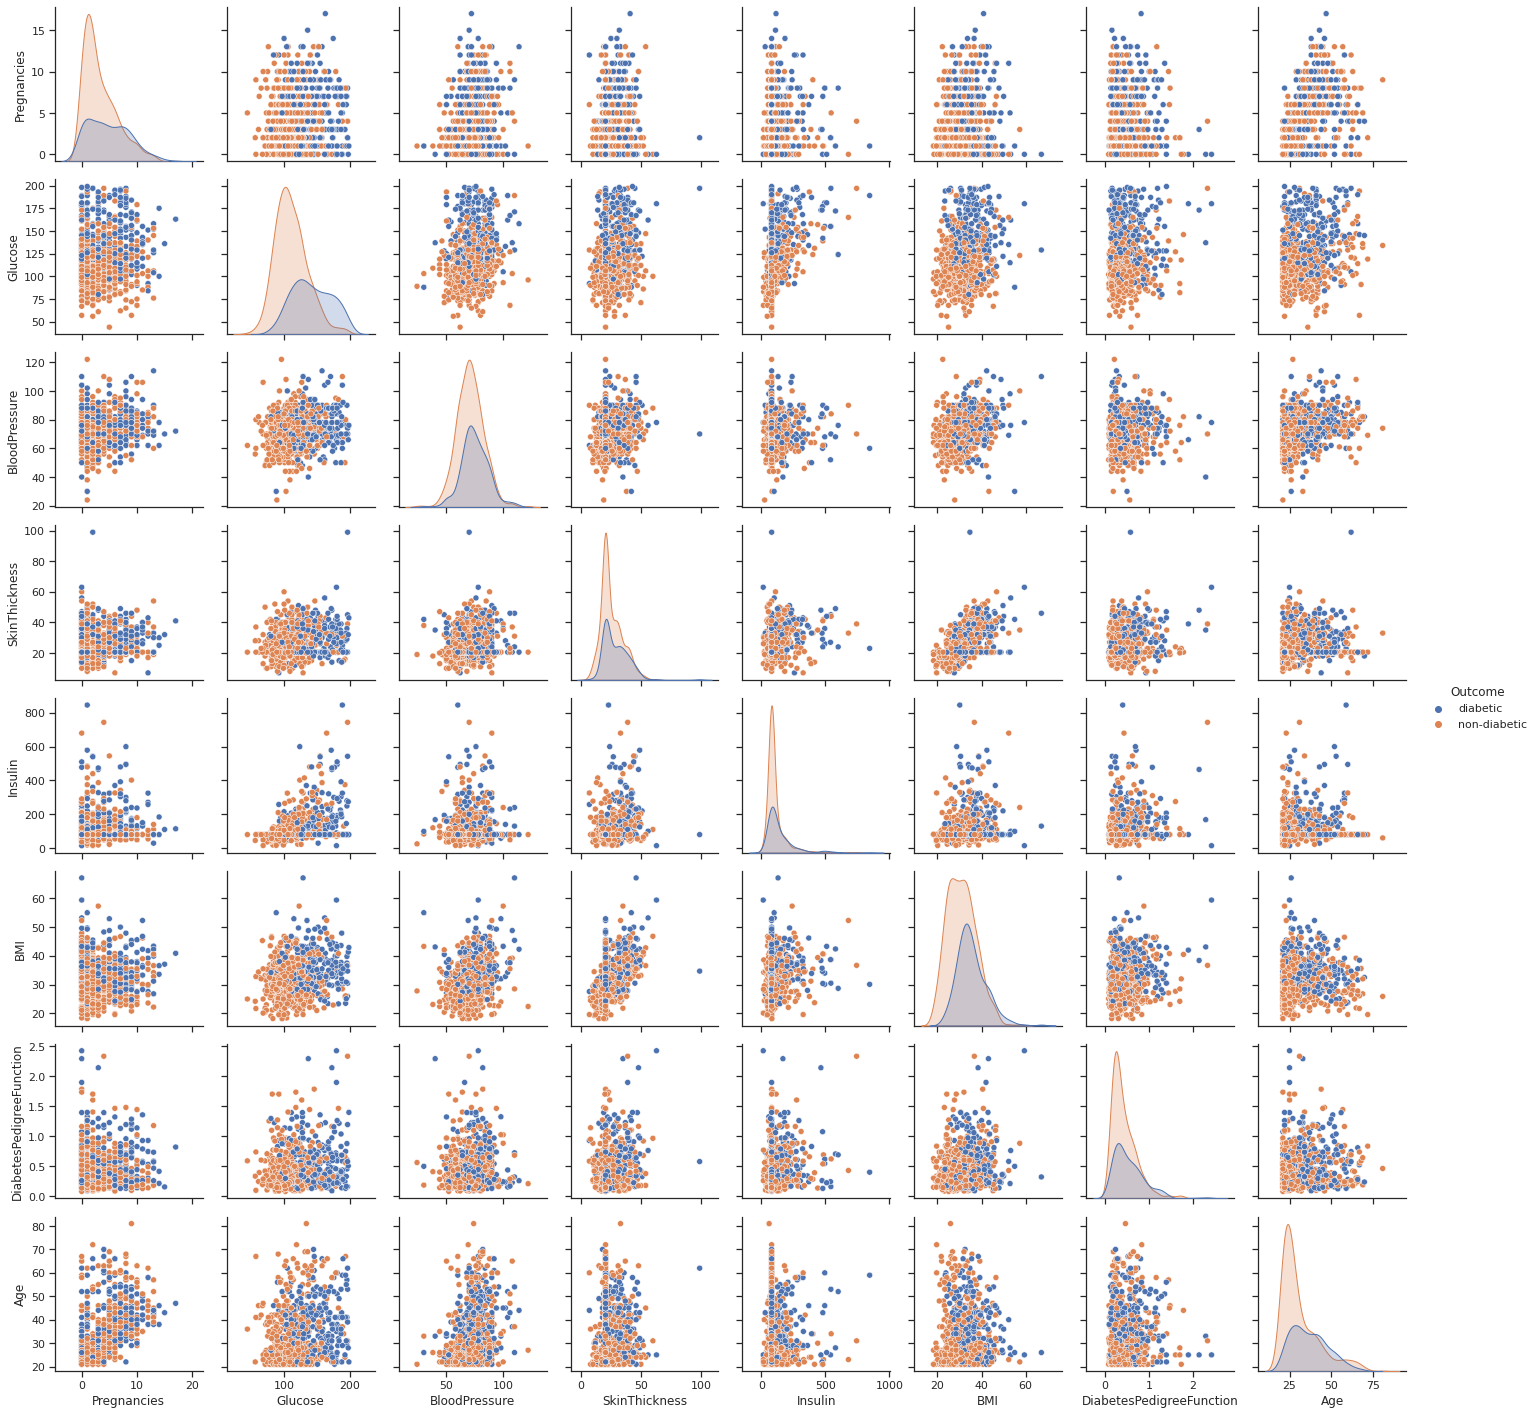

In [ ]:
# Try to plot a pairplot to see which paramaters might have a stronger correlation with either outcomes of diabetic patient
# and non-diabetic patient

df_t = df_0.copy()

df_t['Outcome'].astype('category')
df_t['Outcome'].replace(0,"non-diabetic",inplace=True)
df_t['Outcome'].replace(1,"diabetic",inplace=True)

sns.pairplot(df_t,hue='Outcome',diag_kind='kde');

# Hypothesis Testing


In [ ]:
#Assuming a 5% significance level for all the tests
alpha = 0.05

def hypothesis_result(p_value):
    p_value = round(p_value,4)
    if p_value < alpha:
        print ("As p-value is ",p_value,", which is lower than the significance level, we reject the null hypothesis.")
    else:
        print ("As p-value is ",p_value,", which is higher than the significance level, we do not reject the null hypothesis.")

**First Hypothesis Test**

In [ ]:
from scipy import stats

s2, p2 = stats.normaltest(df_0['Glucose'])

hypothesis_result(p2)

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.


**Second Hypothesis Test**

In [ ]:
s1, p1 = stats.pearsonr(df_0['Glucose'],df_0['Outcome'])

hypothesis_result(p1)
print("The correlation coefficient between Glucose and the Target Variable is: " + str(round(s1,4)))

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.
The correlation coefficient between Glucose and the Target Variable is: 0.4929


# Splitting the Dataset

In [ ]:
# Splitting the data set into training and test set

X = df_0.drop(['Outcome'],axis=1)
Y = df_0['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
# Print the distribution of labels between the training and testing dataset

print("Ratio of Diabetes to Non-Diabetic Labels in training dataset is: {}".format(round(y_train.value_counts()[0] \
                                                                                         /len(y_train),2)))
print("Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: {}".format(round(y_test.value_counts()[0] \
                                                                                         /len(y_test),2)))

Ratio of Diabetes to Non-Diabetic Labels in training dataset is: 0.66
Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: 0.63


## Feature Scaling

In [ ]:
# Scaling the x training and testing dataset
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Imbalanced Dataset

In [ ]:
df_0['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Using SMOTE(Synthetic Minority Over Sampling Technique) to increase the number of samples of diabetic patients for training 
# dataset.
print("Before Upsampling, no. of samples in the training dataset: {}".format(len(X_train)))
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1,k_neighbors = 5, random_state=1)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train.ravel())

print("After Upsampling, no. of samples in the training dataset: {}".format(len(X_train_sm)))
print("After UpSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_sm==0)))

Before Upsampling, no. of samples in the training dataset: 537
Before UpSampling, counts of label '1': 183
Before UpSampling, counts of label '0': 354 

After Upsampling, no. of samples in the training dataset: 708
After UpSampling, counts of label '1': 354
After UpSampling, counts of label '0': 354 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Confusion Matrix function

def conf_mtx(y_act,y_pred):
    cm=metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Diabetic","Non-Diabetic"]],
                  columns = [i for i in ["Predict Diabetic","Predict Non-Diabetic"]])
    plt.figure(figsize = (6,6))
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    Score_Accuracy = "%.2f%%" %(metrics.accuracy_score(y_act,y_pred)*100)
    Score_Recall = "%.2f%%" %(metrics.recall_score(y_act,y_pred)*100)
    Score_Precision = "%.2f%%" %(metrics.precision_score(y_act,y_pred)*100)
    
    print("Model Accuracy Score: " + Score_Accuracy)
    print("Model Recall Score: " + Score_Recall)
    print("Model Precision Score: " + Score_Precision)
    
    return Score_Accuracy,Score_Recall,Score_Precision

In [ ]:
# Prepare an empty summary dataframe to append the data of the various models for comparison
summary = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score','Test Recall Score', \
                                'Test Precision Score', 'AUC'))

In [ ]:
# For building a function for performing ML algos testing

def ML_test(Mdl,Param_grid):
    if bool(Param_grid):
        Mdl = GridSearchCV(Mdl,Param_grid,cv=10)
        Mdl.fit(X_train_sm,y_train_sm)
        Mdl_params = Mdl.best_params_
        Mdl_train_sc = Mdl.cv_results_['mean_test_score'].mean()
        Mdl_test_sc = Mdl.score(X_test_scaled,y_test)
        probas = Mdl.predict_proba(X_test_scaled)
        
        print("Best fit parameter is: " + str(Mdl_params))
        
    else:
        Mdl = Mdl
        Mdl.fit(X_train_sm,y_train_sm)
        Mdl_train_sc = round(Mdl.score(X_train_sm,y_train_sm),4)
        Mdl_test_sc = round(Mdl.score(X_test_scaled,y_test),4)
        probas = Mdl.predict_proba(X_test_scaled)
    
    y_pred = Mdl.predict(X_test_scaled)
    
    print("Training score is: " + str(Mdl_train_sc))
    print("Test Mean score is: " + str(Mdl_test_sc))  
    
    Score_Accuracy,Score_Recall,Score_Precision = conf_mtx(y_test,y_pred)
    Mdl_train_sc = "%.2f%%" % (Mdl_train_sc*100)
    
    # Calculating AUC
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = round(auc(fpr, tpr),4)
    print("Area under the ROC curve : " + str(roc_auc))
    
    return Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc

Best fit parameter is: {'C': 0.2111111111111111, 'penalty': 'l2'}
Training score is: 0.7252766599597584
Test Mean score is: 0.7922077922077922
Model Accuracy Score: 79.22%
Model Recall Score: 77.65%
Model Precision Score: 69.47%
Area under the ROC curve : 0.8763


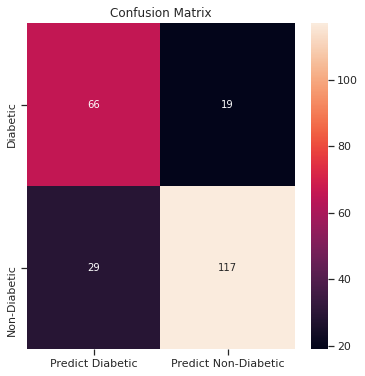

In [ ]:
# Logistic Regression Model

Mdl_LogReg = LogisticRegression(solver="liblinear")

model_name = "LogisticRegression"
Param_grid_LogReg =  {'penalty': ['l1','l2'], 'C': np.linspace(0.1,1.1,10)}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl_LogReg,Param_grid_LogReg)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'metric': 'euclidean', 'n_neighbors': 3}
Training score is: 0.7577434607645875
Test Mean score is: 0.7359307359307359
Model Accuracy Score: 73.59%
Model Recall Score: 74.12%
Model Precision Score: 61.76%
Area under the ROC curve : 0.7884


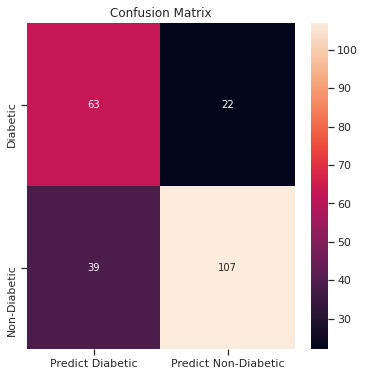

In [ ]:
# K Neighbours Classifier Model

Mdl = KNeighborsClassifier()

model_name = "k-Nearest Neighbours"
Param_grid_kNeigh =  {'n_neighbors': list(np.arange(3,8)), 'metric': ['euclidean','manhattan','chebyshev','minkowski']}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_kNeigh)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'C': 0.9888888888888888, 'kernel': 'rbf'}
Training score is: 0.739758551307847
Test Mean score is: 0.8095238095238095
Model Accuracy Score: 80.95%
Model Recall Score: 77.65%
Model Precision Score: 72.53%
Area under the ROC curve : 0.8674


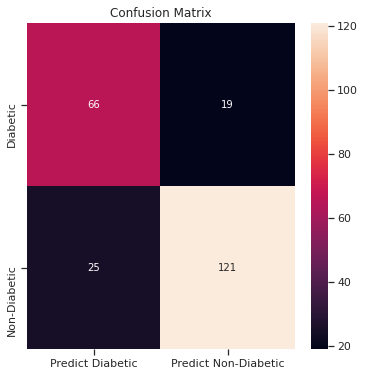

In [ ]:
# Support Vector Machine Model

Mdl = SVC(probability=True)

model_name = "Support Vector Machine"
Param_grid_SVC =  {'C': np.linspace(0.1,1.1,10), 'kernel': ['linear','poly','rbf',]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_SVC)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.009}
Training score is: 0.7519604292421196
Test Mean score is: 0.7662337662337663
Model Accuracy Score: 76.62%
Model Recall Score: 83.53%
Model Precision Score: 63.96%
Area under the ROC curve : 0.8587


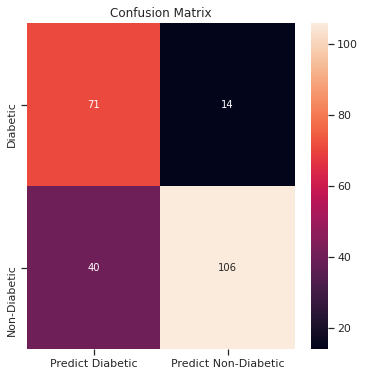

In [ ]:
# Decision Tree Model

Mdl = DecisionTreeClassifier(random_state=1)

model_name = "DecisionTreeClassifier"
Param_grid_dt = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_dt)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0007}
Training score is: 0.7882669349429912
Test Mean score is: 0.8095238095238095
Model Accuracy Score: 80.95%
Model Recall Score: 83.53%
Model Precision Score: 70.30%
Area under the ROC curve : 0.879


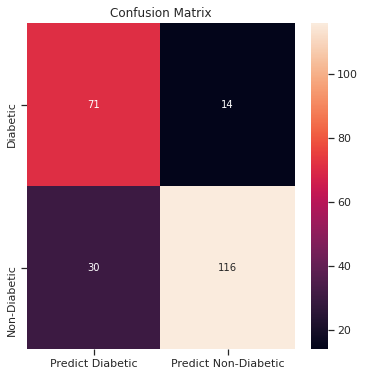

In [ ]:
# Random Forest Model

Mdl = RandomForestClassifier(random_state=1,n_estimators=100)

model_name = "RandomForestClassifier"
Param_grid_rf = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_rf)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

In [ ]:
summary

,Model,Training Accuracy,Test Accuracy Score,Test Recall Score,Test Precision Score,AUC
0,LogisticRegression,72.53%,79.22%,77.65%,69.47%,0.8763
1,k-Nearest Neighbours,75.77%,73.59%,74.12%,61.76%,0.7884
2,DecisionTreeClassifier,75.20%,76.62%,83.53%,63.96%,0.8587
3,DecisionTreeClassifier,75.20%,76.62%,83.53%,63.96%,0.8587
